In [1]:
import seaborn as sns
from pathlib import Path
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# Initialize and import channel images

In [2]:
#info about directory
print(f"Current directory: {Path.cwd()}")
print(f"Home directory: {Path.home()}")

Current directory: /Users/anna/Documents/PhD/CalcificationImaging/ImageAnalysis
Home directory: /Users/anna


In [3]:
##importing all channel images into dataframe


os.chdir(r"/Users/anna/Documents/PhD/CalcificationImaging/ImagingData/CaPConcRange01/20x_tiff/")#direct to image dir
img_dir = Path('')

img_df = pd.DataFrame({'path': list(img_dir.glob('C3*.tif'))})#3 channel fluorescence image split 
#into 3 seperate tif files, C1-channel1; filenameparts seperated by '-';
img_df['base'] = img_df['path'].map(lambda c_path: c_path.as_posix())#convert path to string
img_df['exp_num'] =img_df['base'].apply(lambda base:base.split('-')[1:3])#experiment code of lif file
img_df['cond'] =img_df['base'].apply(lambda base:base.split('-')[3])#sample condition
img_df['Brightfield'] = img_df['path'].map(
        lambda c_path: imread(c_path))#read in channel 1

img_df['Hoechst'] = img_df['cond'].apply(lambda cond: imread('C4-20200131_RPTEC-CaP_concRange01.lif -{}'.format(cond)))#read in Hoechst channel 
img_df['CellMask'] = img_df['cond'].apply(lambda cond: imread('C5-20200131_RPTEC-CaP_concRange01.lif -{}'.format(cond)))#read in CellMaSK channel 
img_df['EthD'] = img_df['cond'].apply(lambda cond: imread('C2-20200131_RPTEC-CaP_concRange01.lif -{}'.format(cond)))#read in EthD channel
img_df['Calcein'] = img_df['cond'].apply(lambda cond: imread('C1-20200131_RPTEC-CaP_concRange01.lif -{}'.format(cond)))#read in Hoechst channel #read in EthD channel

# !! adapt cond_short dependending on cond: check head of df if correct

In [4]:
img_df['cond'].iloc[0][5:8]

'c01'

In [5]:
##sort dataframe by condition column
#img_df['cond_short']=img_df['cond'].apply(lambda str:str[1:4])
img_df['cond_short']=img_df['cond'].apply(lambda str:str[5:8])
img_df.sort_values(by='cond',axis=0,inplace=True)
img_df.reset_index(inplace=True)
img_df.head()

index                                               path  \
0      9  C3-20200131_RPTEC-CaP_concRange01.lif - 20x_c0...   
1     11  C3-20200131_RPTEC-CaP_concRange01.lif - 20x_c0...   
2     14  C3-20200131_RPTEC-CaP_concRange01.lif - 20x_c0...   
3     38  C3-20200131_RPTEC-CaP_concRange01.lif - 20x_c0...   
4     43  C3-20200131_RPTEC-CaP_concRange01.lif - 20x_c0...   

                                                base  \
0  C3-20200131_RPTEC-CaP_concRange01.lif - 20x_c0...   
1  C3-20200131_RPTEC-CaP_concRange01.lif - 20x_c0...   
2  C3-20200131_RPTEC-CaP_concRange01.lif - 20x_c0...   
3  C3-20200131_RPTEC-CaP_concRange01.lif - 20x_c0...   
4  C3-20200131_RPTEC-CaP_concRange01.lif - 20x_c0...   

                                  exp_num                cond  \
0  [20200131_RPTEC, CaP_concRange01.lif ]   20x_c00_w1_01.tif   
1  [20200131_RPTEC, CaP_concRange01.lif ]   20x_c00_w1_02.tif   
2  [20200131_RPTEC, CaP_concRange01.lif ]   20x_c00_w1_03.tif   
3  [20200131_RPTEC, CaP_concRange01.lif ]   20x_c00_w2_01.tif   
4  [20200131_RPTEC, CaP_concRange01.lif ]   20x_c00_w2_02.tif   

                                         Brightfield  \
0  [[64, 65, 64, 65, 63, 64, 65, 64, 64, 64, 61, ...   
1  [[82, 88, 87, 81, 70, 56, 45, 41, 44, 50, 57, ...   
2  [[78, 77, 75, 74, 78, 78, 74, 75, 83, 84, 83, ...   
3  [[121, 121, 125, 127, 128, 129, 133, 129, 124,...   
4  [[123, 125, 127, 135, 138, 144, 142, 134, 129,...   

                                             Hoechst  \
0  [[55, 58, 62, 58, 60, 61, 64, 66, 67, 65, 64, ...   
1  [[21, 20, 18, 18, 16, 16, 17, 15, 13, 15, 14, ...   
2  [[65, 65, 63, 62, 58, 60, 55, 51, 50, 44, 37, ...   
3  [[21, 23, 23, 23, 24, 22, 23, 21, 20, 19, 20, ...   
4  [[71, 75, 80, 76, 78, 78, 75, 75, 76, 72, 69, ...   

                                            CellMask  \
0  [[53, 55, 55, 61, 61, 58, 55, 51, 58, 53, 52, ...   
1  [[44, 49, 45, 49, 48, 52, 54, 61, 58, 46, 45, ...   
2  [[50, 51, 48, 47, 47, 48, 45, 49, 51, 49, 49, ...   
3  [[27, 26, 27, 27, 27, 27, 33, 30, 30, 29, 32, ...   
4  [[51, 51, 49, 48, 47, 49, 48, 47, 45, 51, 51, ...   

                                                EthD  \
0  [[7, 7, 6, 6, 6, 7, 7, 7, 6, 7, 6, 7, 6, 6, 6,...   
1  [[6, 7, 8, 6, 6, 7, 7, 6, 7, 7, 6, 6, 5, 7, 6,...   
2  [[7, 8, 7, 8, 8, 8, 7, 7, 7, 6, 8, 6, 6, 7, 6,...   
3  [[5, 7, 6, 6, 5, 6, 7, 7, 6, 6, 7, 7, 5, 6, 6,...   
4  [[8, 8, 6, 8, 8, 7, 8, 7, 7, 6, 6, 8, 7, 7, 6,...   

                                             Calcein cond_short  
0  [[2, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 2, 2,...        c00  
1  [[3, 3, 4, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3,...        c00  
2  [[3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3,...        c00  
3  [[3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 4, 3, 3, 2, 2,...        c00  
4  [[2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3,...        c00

# Hoechst: count cells

In [6]:
##Hoechst: binarize

from skimage.filters import threshold_triangle

img_df['hoechst_bw']="" #new column in dataframe for bw img
img_df['t_hoechst']="" #new column for chosen threshold

for img, (idx,_) in zip(img_df['Hoechst'], img_df.iterrows()):  
    t=threshold_triangle(img)
    img_df['hoechst_bw'].iloc[idx]=img>t
    img_df['t_hoechst'].iloc[idx]=t

/Users/anna/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
##Hoechst segmentation and count v2-optimized

from skimage.filters import threshold_local, median
from skimage.morphology import binary_erosion,disk,watershed,dilation
from scipy import ndimage as ndi
from skimage.feature import peak_local_max

img_df['local_maxi']=''

#prepare seeds from Hoechst channel
img_df['distance']=img_df['hoechst_bw'].apply(lambda hoechst_bw:ndi.distance_transform_edt(hoechst_bw))

for (idx,_) in img_df.iterrows():
    img_df['local_maxi'].iloc[idx]=peak_local_max(img_df['distance'].iloc[idx], indices=False, footprint=np.ones((30,30)),
                                                  labels=img_df['hoechst_bw'].iloc[idx])
img_df['local_maxi_extend']=img_df['local_maxi'].apply(lambda maxi: dilation(maxi,disk(3)))
img_df['hoechst_seeds']=img_df['local_maxi_extend'].apply(lambda maxi:ndi.label(maxi)[0]) #extend local maxima to 
#avoid two seeds very close together

#watershed
img_df['hoechst_labels']=''
img_df['hoechst_line']=''


for (idx,_) in img_df.iterrows():
    img_df['hoechst_labels'].iloc[idx]=watershed(-img_df['distance'].iloc[idx],img_df['hoechst_seeds'].iloc[idx],
                                                 mask=img_df['hoechst_bw'].iloc[idx],
                                                 watershed_line=True,compactness=200)
    #high compactness makes nuclei in cluster more uniform
    img_df['hoechst_line'].iloc[idx]=img_df['hoechst_labels'].iloc[idx]==0

    #count    
img_df['nuclei_count']=img_df['hoechst_labels'].apply(lambda labels:np.amax(labels))




# EthD - count dead cells

In [8]:
## EthD binarize

img_df['EthD_99']=img_df['EthD'].apply(lambda int: np.percentile(int,99))

t=60 #lower fixed threshold
img_df['ethd_mask']=''
img_df['ethd_mask_f']=''

for (idx,_) in img_df.iterrows():
    img_df['ethd_mask'].iloc[idx]=img_df['EthD'].iloc[idx]>img_df['EthD_99'].iloc[idx]
    img_df['ethd_mask_f'].iloc[idx]=img_df['ethd_mask'].iloc[idx]*img_df['EthD'].iloc[idx]

img_df['ethd_mask_bw']=img_df['ethd_mask_f'].apply(lambda img: img>t) #lower fixed threshold



In [9]:
## EthD-watershed to seperate touching objects
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage.measure import regionprops

Tarea=20 #filter for small noise
img_df['ethd_distance']=img_df['ethd_mask_bw'].apply(lambda mask: ndi.distance_transform_edt(mask))
#greyscale distance or binary distance?

img_df['ethd_local_maxi']=''
img_df['ethd_labels']=''
img_df['ethd_areas']=np.empty((len(img_df), 0)).tolist()
img_df['ethd_areasFilter']=np.empty((len(img_df), 0)).tolist()
img_df['ethd_props']=''
img_df['ethd_count']=''

for (idx,_) in img_df.iterrows():
    img_df['ethd_local_maxi'].iloc[idx]=peak_local_max(img_df['ethd_distance'].iloc[idx],indices=False,
                                                  footprint=np.ones((20,20)),labels=img_df['ethd_mask_bw'].iloc[idx])

img_df['ethd_maxi_extend']=img_df['ethd_local_maxi'].apply(lambda maxi: dilation(maxi,disk(5)))
img_df['ethd_seeds']=img_df['ethd_local_maxi'].apply(lambda maxi:ndi.label(maxi)[0]) #extend local maxima to 
#avoid two seeds very close together



for (idx,_) in img_df.iterrows():
    img_df['ethd_labels'].iloc[idx]=watershed(-img_df['ethd_distance'].iloc[idx],img_df['ethd_seeds'].iloc[idx],\
                                         mask=img_df['ethd_mask_bw'].iloc[idx])
    img_df['ethd_props'].iloc[idx]=regionprops(img_df['ethd_labels'].iloc[idx])
    for p in img_df['ethd_props'].iloc[idx]:
        img_df['ethd_areas'].iloc[idx].append(p.area)

    img_df['ethd_areasFilter'].iloc[idx]=(list(filter(lambda ele:ele>Tarea, img_df['ethd_areas'].iloc[idx]))) #upper threshold for patch area
    img_df['ethd_count'].iloc[idx]=len(img_df['ethd_areasFilter'].iloc[idx])



# cellmask channel - single cell segmentation

In [10]:
##adaptive thresholding of cellmask channel
from skimage.morphology import medial_axis

block_size = 35
img_df['adaptiveT']=img_df['CellMask'].apply(lambda cellmask:threshold_local(cellmask, block_size))


img_df['cellmask_adp']=''

for (idx,_) in img_df.iterrows():
    
    img_df['cellmask_adp'].iloc[idx]=img_df['CellMask'].iloc[idx]> img_df['adaptiveT'].iloc[idx] 
#median filtering and erosion of thresholded cellmask img
img_df['cellmask_med']=img_df['cellmask_adp'].apply(lambda cellmask_adp: median(cellmask_adp,disk(5)))
img_df['cellmask_eros']=img_df['cellmask_med'].apply(lambda cellmask_med:binary_erosion(cellmask_med))

img_df['cellmask_skeleton']=img_df['cellmask_eros'].apply(lambda img:medial_axis(img))
img_df['distance_eros']=img_df['cellmask_eros'].apply(lambda img:ndi.distance_transform_edt(img))



In [11]:
##cellmask-watershed (alternative 1): distance of binary erosion of cellmask; seeds of Hoechst channel
img_df['cellmask_labels']=''
img_df['cellmask_line']=''

for (idx,_) in img_df.iterrows():
    img_df['cellmask_labels'].iloc[idx]=watershed(img_df['distance_eros'].iloc[idx],
                                                  img_df['hoechst_seeds'].iloc[idx], watershed_line=True)
    img_df['cellmask_line'].iloc[idx]=img_df['cellmask_labels'].iloc[idx]==0

## correlation between calcein and cellmask channels

In [12]:
##compute ssim and difference image
from skimage.measure import compare_ssim

img_df['ssim_cm']=''
img_df['grad_cm']=''

for (idx,_) in img_df.iterrows():
    img_df['ssim_cm'].iloc[idx],img_df['grad_cm'].iloc[idx]=compare_ssim(img_df['Calcein'].iloc[idx],
                                                               img_df['CellMask'].iloc[idx],gradient=True)
   

## calcein binary image

In [13]:
## calcein channel features - binarize and total area
from skimage.measure import label
from skimage.color import label2rgb

img_df['calcein_bw']="" #new column in dataframe for bw img
img_df['calcein_threshold']="" #new column for chosen threshold

for img, (idx,_) in zip(img_df['Calcein'], img_df.iterrows()):  
    t=threshold_triangle(img)
    img_df['calcein_bw'].iloc[idx]=img>t
    img_df['calcein_threshold'].iloc[idx]=t


img_df['calcein_area']=img_df['calcein_bw'].apply(lambda bw:bw.sum())#calculate total CaP area with sum of True px
img_df['calcein_label']=img_df['calcein_bw'].apply(lambda x: label(x)) #label connected CaP patches
img_df['calcein_count']=img_df['calcein_label'].apply(lambda x: np.amax(x))

# Image visualization

In [14]:
groups={'c00':'1/1','c01':'2/2','c02':'2/5','c03':'5/7','c04':'7/7'}#adapt according to exp
img_df['cond_name']=img_df['cond_short'].map(groups)
len(img_df)

45

In [15]:
img_df.columns

Index(['index', 'path', 'base', 'exp_num', 'cond', 'Brightfield', 'Hoechst',
       'CellMask', 'EthD', 'Calcein', 'cond_short', 'hoechst_bw', 't_hoechst',
       'local_maxi', 'distance', 'local_maxi_extend', 'hoechst_seeds',
       'hoechst_labels', 'hoechst_line', 'nuclei_count', 'EthD_99',
       'ethd_mask', 'ethd_mask_f', 'ethd_mask_bw', 'ethd_distance',
       'ethd_local_maxi', 'ethd_labels', 'ethd_areas', 'ethd_areasFilter',
       'ethd_props', 'ethd_count', 'ethd_maxi_extend', 'ethd_seeds',
       'adaptiveT', 'cellmask_adp', 'cellmask_med', 'cellmask_eros',
       'cellmask_skeleton', 'distance_eros', 'cellmask_labels',
       'cellmask_line', 'ssim_cm', 'grad_cm', 'calcein_bw',
       'calcein_threshold', 'calcein_area', 'calcein_label', 'calcein_count',
       'cond_name'],
      dtype='object')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/anna/Documents/PhD/CalcificationImaging/Data/paperFig_v1/'

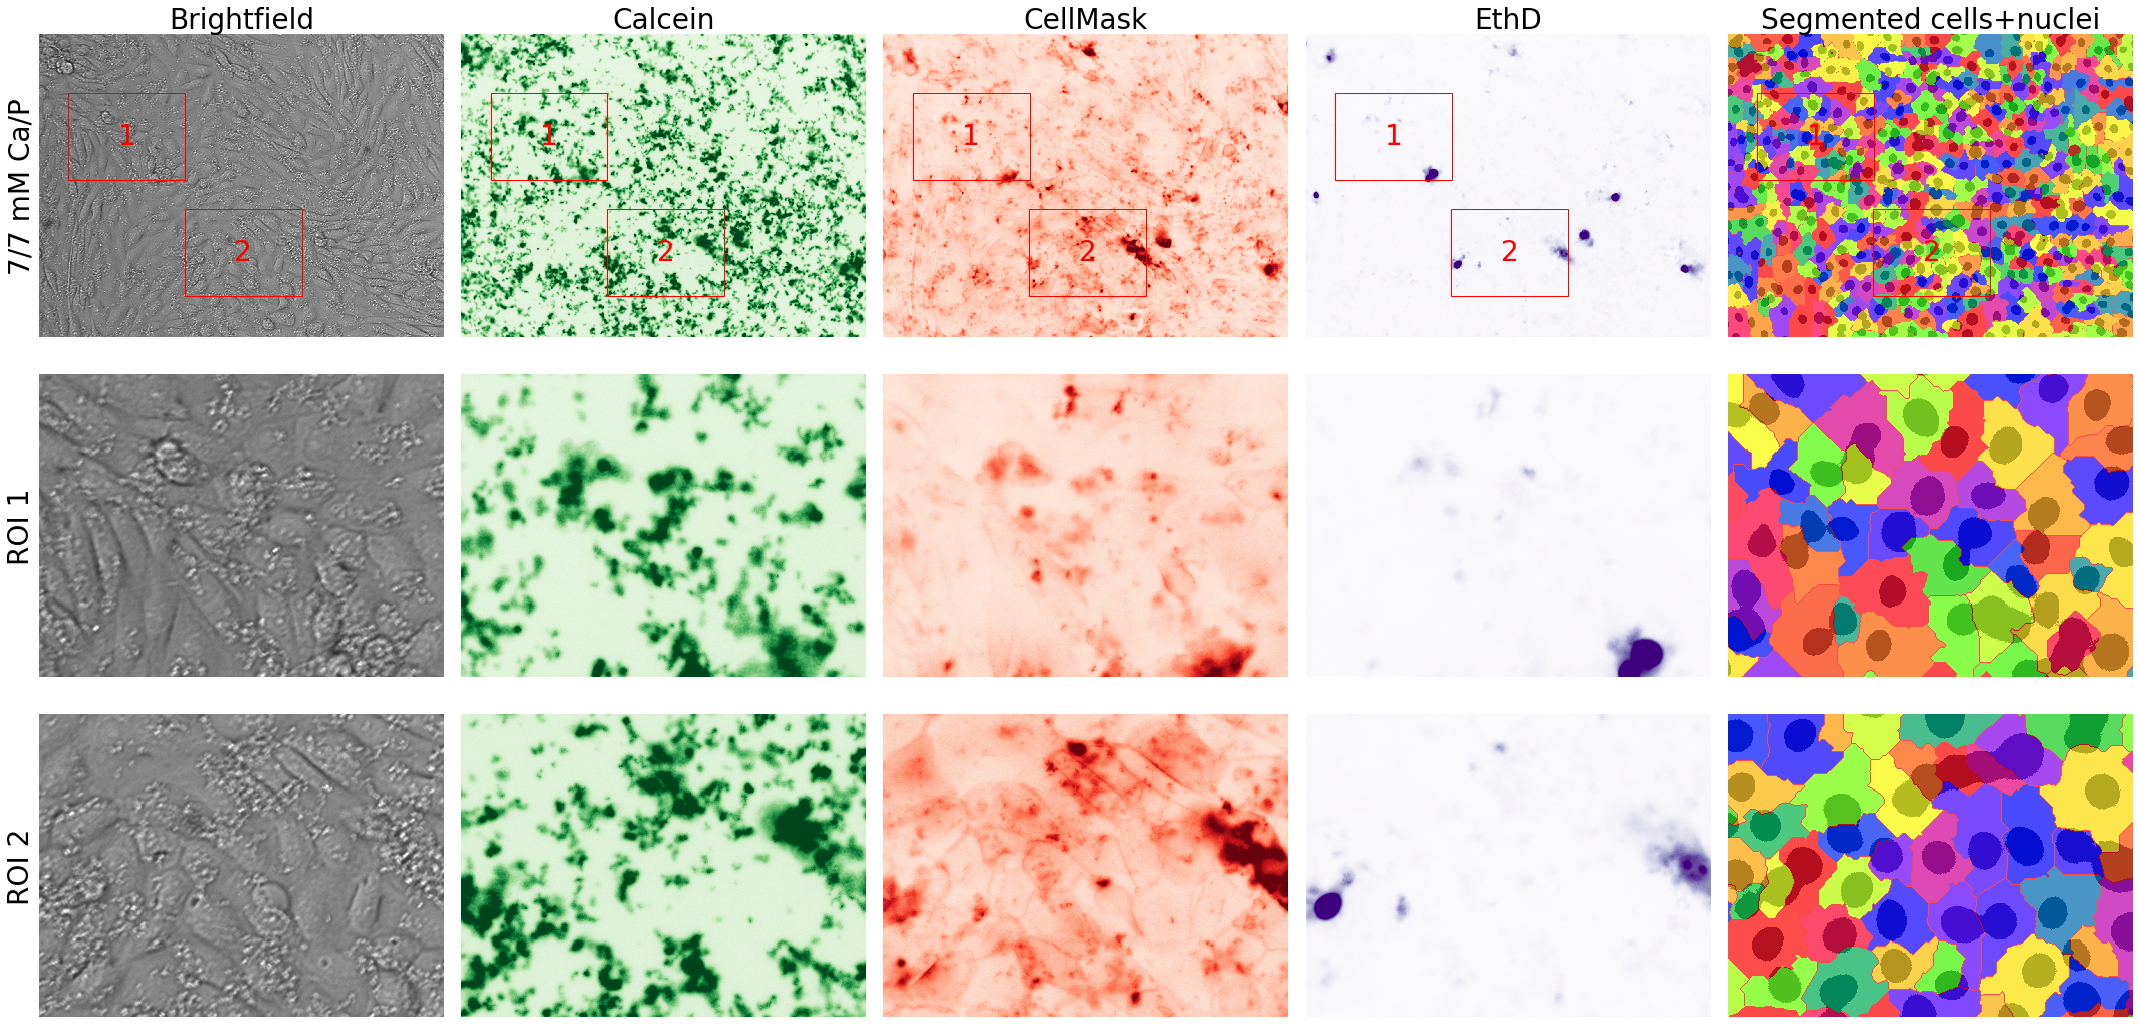

In [16]:
##Fig2: visualize ROIs of calcein and cellmask 

from copy import copy
import matplotlib.patches as patches

rc = {"axes.spines.left" : False,
      "axes.spines.right" : False,
      "axes.spines.bottom" : False,
      "axes.spines.top" : False,
      "xtick.bottom" : False,
      "xtick.labelbottom" : False,
      "ytick.labelleft" : False,
      "ytick.left" : False,
      'font.size': 16}
plt.rcParams.update(rc)

vmin=0
vmax=100

##define 2 ROIs
h=300 #height
w=402 #width

x1=100 #define lower left corner of ROI1
y1=200
c1_1=x1+(w/2)
c1_2=y1+(h/2)
roi1_bb=patches.Rectangle((x1,y1),w,h,linewidth=1,edgecolor='r',facecolor='none') #roi with left bottom corner defined
roi1_list=[]
for x in range(5):
    roi1_list.append(roi1_bb)

x2=500 #define lower left corner of ROI2
y2=600
c2_1=x2+(w/2)
c2_2=y2+(h/2)
roi2_bb=patches.Rectangle((x2,y2),w,h,linewidth=1,edgecolor='r',facecolor='none')
roi2_list=[]
for x in range(5):
    roi2_list.append(roi2_bb)

##extract channel images
test_idx=42#define test image 

test_img2=img_df.iloc[test_idx]
test_img2=test_img2[['CellMask','Hoechst','hoechst_seeds','cellmask_labels','hoechst_bw','cellmask_line',
                     'Brightfield','EthD','Calcein']]
test_img2=test_img2.to_frame()
test_img2=test_img2.transpose()
test_img2.reset_index(inplace=True)
test_img2.drop('index',axis=1,inplace=True)

roi1=pd.DataFrame(columns=test_img2.columns) #new dataframe for roi1 data
roi2=pd.DataFrame(columns=test_img2.columns) #new dataframe for roi2 data

##extraxt ROIs for each channel as new row
for idx in list(test_img2):
    roi1[idx]=(test_img2[idx].apply(lambda img:img[y1:y1+h+1,x1:x1+w+1]))
    roi2[idx]=(test_img2[idx].apply(lambda img:img[y2:y2+h+1,x2:x2+w+1]))
    
test_img2=test_img2.append(roi1) #add roi1 and 2 data to test_img
test_img2=test_img2.append(roi2)
test_img2.reset_index(inplace=True)

##plot full image and rois of all channels
fig1, m_axs = plt.subplots(len(test_img2),5, figsize=(30,15)) #plot some example images
fig1.tight_layout()

    
for (ax1,ax2,ax3,ax4,ax5), (idx,_) in zip(m_axs, test_img2.iterrows()):
    
    ax1.imshow(test_img2['Brightfield'].iloc[idx],cmap='gray',vmin=vmin,vmax=120)
    ax2.imshow(test_img2['Calcein'].iloc[idx],cmap='Greens',vmin=vmin,vmax=100)
    ax3.imshow(test_img2['CellMask'].iloc[idx],cmap='Reds',vmin=vmin,vmax=150)
    ax4.imshow(test_img2['EthD'].iloc[idx],cmap='Purples',vmax=200)
    ax5.imshow(test_img2['cellmask_labels'].iloc[idx],cmap=plt.cm.prism)
    ax5.imshow(test_img2['hoechst_bw'].iloc[idx],cmap='Blues',alpha=0.3)
    
## add bounding box of ROIs to original image
for ax,bb1 in zip(m_axs[0,:],roi1_list):
    ax.add_patch(copy(bb1))
    ax.text(c1_1,c1_2,s='1',fontsize=28,color='r',horizontalalignment='center',verticalalignment='center')
for ax,bb2 in zip(m_axs[0,:],roi2_list):
    ax.add_patch(copy(bb2))
    ax.text(c2_1,c2_2,s='2',fontsize=28,color='r',horizontalalignment='center',verticalalignment='center')

## add labelling - channel and roi
cols=['Brightfield', 'Calcein', 'CellMask','EthD','Segmented cells+nuclei']
for ax, col in zip(m_axs[0], cols):
    ax.set_title(col,size=28)
    
rows=['{} mM Ca/P'.format(img_df['cond_name'].iloc[test_idx]), 'ROI 1', 'ROI 2']    
for ax, row in zip(m_axs[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size=28)
fig1.tight_layout()    

os.chdir(r"/Users/anna/Documents/PhD/CalcificationImaging/ImagingData/paperFig_v1/")
#plt.savefig('ROIs_Segmentation_CaPrange01_{}.png'.format(img_df['cond_short'].iloc[test_idx]),bbox_inches="tight")

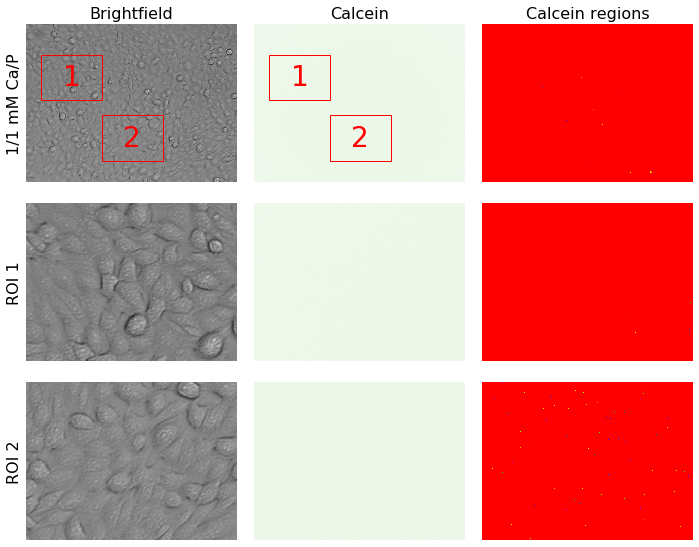

In [63]:
##Calcein detection vs Brightfield

vmin=0
vmax=100

##define 2 ROIs
h=300 #height
w=402 #width

x1=100 #define lower left corner of bb
y1=200
c1_1=x1+(w/2)
c1_2=y1+(h/2)
roi1_bb=patches.Rectangle((x1,y1),w,h,linewidth=1,edgecolor='r',facecolor='none') #roi with left bottom corner defined
roi1_list=[]
for x in range(5):
    roi1_list.append(roi1_bb)

x2=500
y2=600
c2_1=x2+(w/2)
c2_2=y2+(h/2)
roi2_bb=patches.Rectangle((x2,y2),w,h,linewidth=1,edgecolor='r',facecolor='none')
roi2_list=[]
for x in range(5):
    roi2_list.append(roi2_bb)

##extract channel images
test_idx=6 #define test image 

test_img2=img_df.iloc[test_idx]
test_img2=test_img2[['CellMask','Hoechst','hoechst_seeds','cellmask_labels','hoechst_bw','cellmask_line',
                     'Brightfield','EthD','Calcein','distance_eros','calcein_label']]
test_img2=test_img2.to_frame()
test_img2=test_img2.transpose()
test_img2.reset_index(inplace=True)
test_img2.drop('index',axis=1,inplace=True)

roi1=pd.DataFrame(columns=test_img2.columns) #new dataframe for roi1 data
roi2=pd.DataFrame(columns=test_img2.columns) #new dataframe for roi2 data

##extraxt ROIs for each channel as new row
for idx in list(test_img2):
    roi1[idx]=(test_img2[idx].apply(lambda img:img[y1:y1+h+1,x1:x1+w+1]))
    roi2[idx]=(test_img2[idx].apply(lambda img:img[y2:y2+h+1,x2:x2+w+1]))
    
test_img2=test_img2.append(roi1) #add roi1 and 2 data to test_img
test_img2=test_img2.append(roi2)
test_img2.reset_index(inplace=True)

##plot full image and rois of all channels
fig1, m_axs = plt.subplots(len(test_img2),3, figsize=(10,8)) #plot some example images
fig1.tight_layout()

    
for (ax1,ax2,ax3), (idx,_) in zip(m_axs, test_img2.iterrows()):
    
    ax1.imshow(test_img2['Brightfield'].iloc[idx],cmap='gray',vmin=vmin,vmax=120)
    ax2.imshow(test_img2['Calcein'].iloc[idx],cmap='Greens',vmin=vmin,vmax=100)
    ax3.imshow(test_img2['calcein_label'].iloc[idx],cmap=plt.cm.prism)
    
    
       
## add bounding box of ROIs to original image
for ax,bb1 in zip(m_axs[0,:],roi1_list):
    ax.add_patch(copy(bb1))
    ax.text(c1_1,c1_2,s='1',fontsize=28,color='r',horizontalalignment='center',verticalalignment='center')
for ax,bb2 in zip(m_axs[0,:],roi2_list):
    ax.add_patch(copy(bb2))
    ax.text(c2_1,c2_2,s='2',fontsize=28,color='r',horizontalalignment='center',verticalalignment='center')

## add labelling - channel and roi
cols=['Brightfield', 'Calcein','Calcein regions']
for ax, col in zip(m_axs[0], cols):
    ax.set_title(col,size=16)
    
rows=['{} mM Ca/P'.format(img_df['cond_name'].iloc[test_idx]), 'ROI 1', 'ROI 2']    
for ax, row in zip(m_axs[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size=16)
fig1.tight_layout()    

os.chdir(r"/Users/anna/Documents/PhD/CalcificationImaging/ImagingData/paperFig_v1/")
#plt.savefig('Fig2C_calceinSeg_CaPrange01_{}.png'.format(img_df['cond_short'].iloc[test_idx]),bbox_inches="tight")


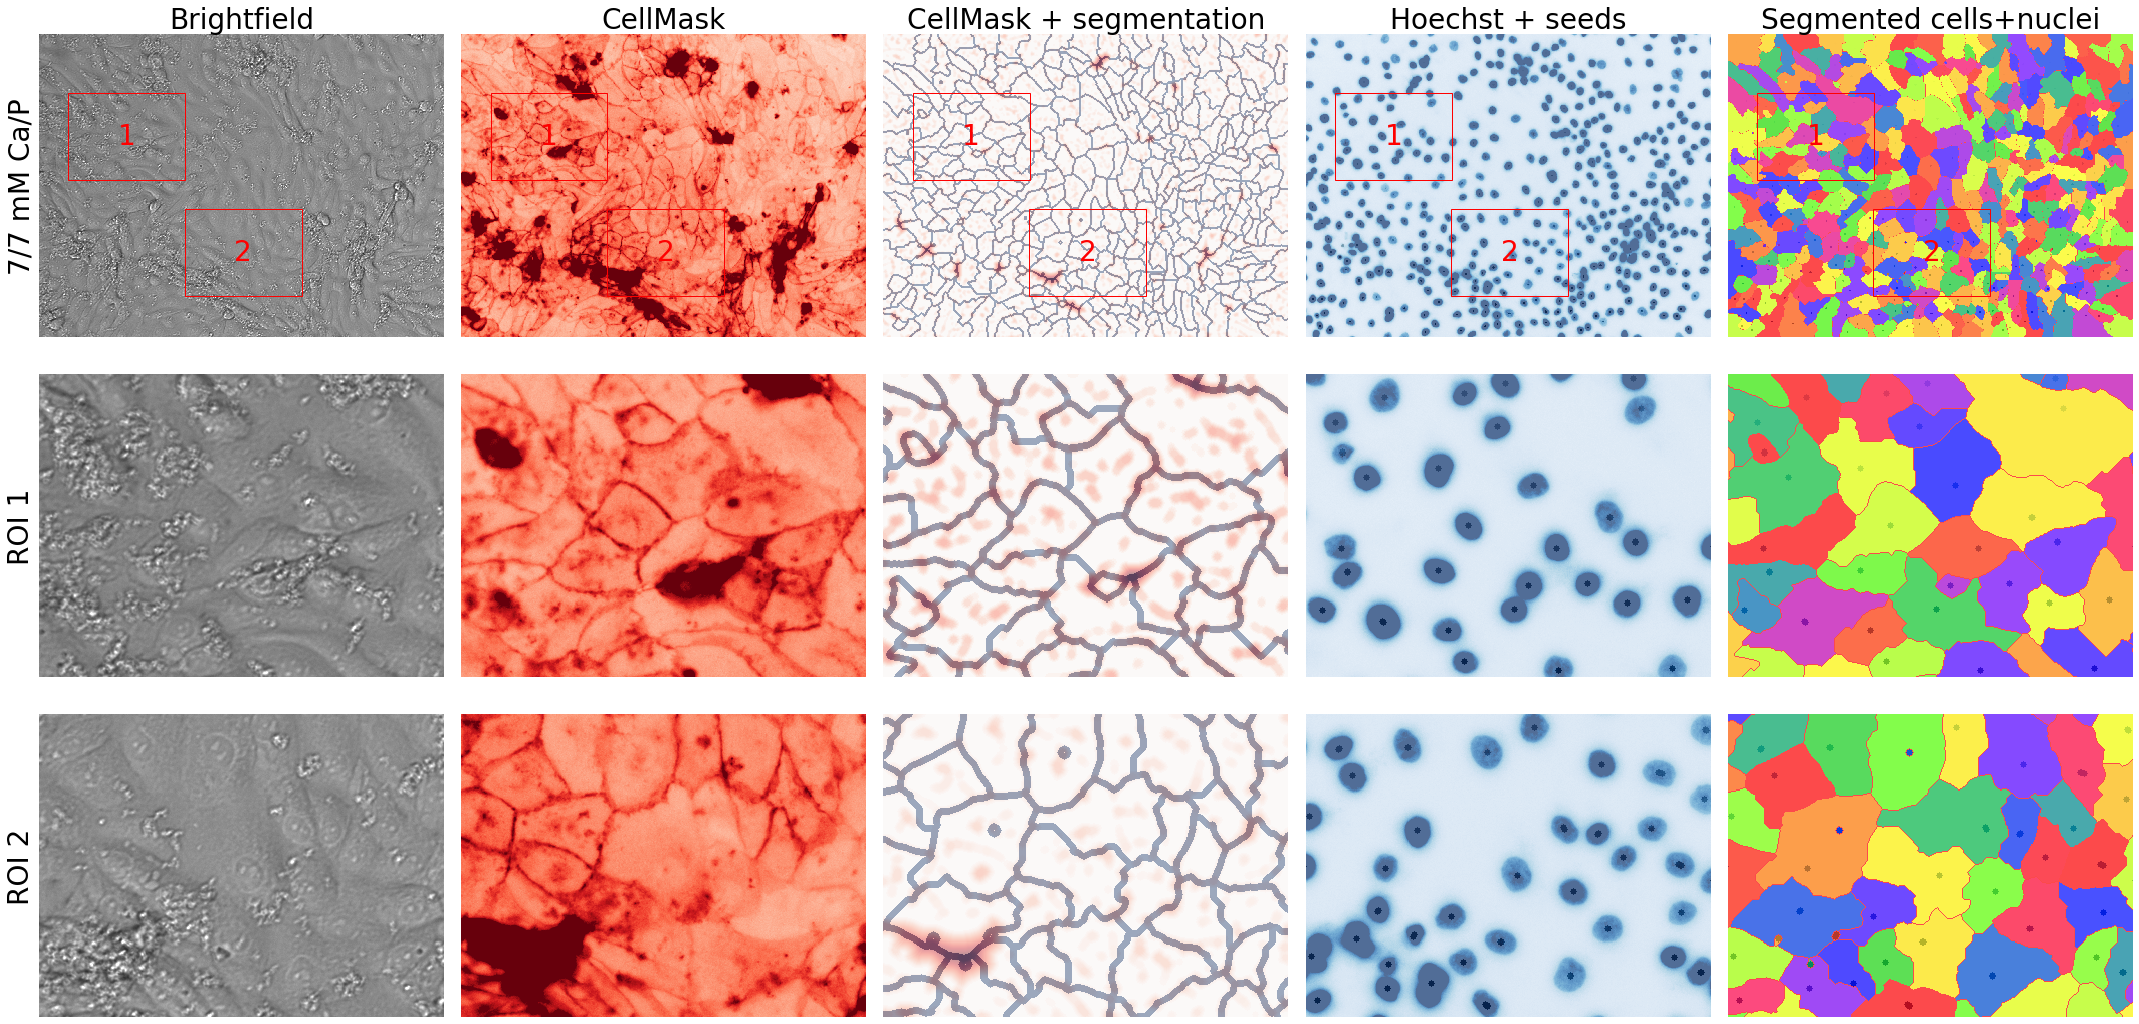

In [17]:
##Fig.1B: cellmask and hoechst segmentation

vmin=0
vmax=100

##define 2 ROIs
h=300 #height
w=402 #width

x1=100 #define lower left corner of bb
y1=200
c1_1=x1+(w/2)
c1_2=y1+(h/2)
roi1_bb=patches.Rectangle((x1,y1),w,h,linewidth=1,edgecolor='r',facecolor='none') #roi with left bottom corner defined
roi1_list=[]
for x in range(5):
    roi1_list.append(roi1_bb)

x2=500
y2=600
c2_1=x2+(w/2)
c2_2=y2+(h/2)
roi2_bb=patches.Rectangle((x2,y2),w,h,linewidth=1,edgecolor='r',facecolor='none')
roi2_list=[]
for x in range(5):
    roi2_list.append(roi2_bb)

##extract channel images
test_idx=44#define test image 

test_img2=img_df.iloc[test_idx]
test_img2=test_img2[['CellMask','Hoechst','hoechst_seeds','cellmask_labels','hoechst_bw','cellmask_line',
                     'Brightfield','EthD','Calcein','distance_eros']]
test_img2=test_img2.to_frame()
test_img2=test_img2.transpose()
test_img2.reset_index(inplace=True)
test_img2.drop('index',axis=1,inplace=True)

roi1=pd.DataFrame(columns=test_img2.columns) #new dataframe for roi1 data
roi2=pd.DataFrame(columns=test_img2.columns) #new dataframe for roi2 data

##extraxt ROIs for each channel as new row
for idx in list(test_img2):
    roi1[idx]=(test_img2[idx].apply(lambda img:img[y1:y1+h+1,x1:x1+w+1]))
    roi2[idx]=(test_img2[idx].apply(lambda img:img[y2:y2+h+1,x2:x2+w+1]))
    
test_img2=test_img2.append(roi1) #add roi1 and 2 data to test_img
test_img2=test_img2.append(roi2)
test_img2.reset_index(inplace=True)

##plot full image and rois of all channels
fig1, m_axs = plt.subplots(len(test_img2),5, figsize=(30,15)) #plot some example images
fig1.tight_layout()

    
for (ax1,ax2,ax3,ax4,ax5), (idx,_) in zip(m_axs, test_img2.iterrows()):
    
    ax1.imshow(test_img2['Brightfield'].iloc[idx],cmap='gray',vmin=vmin,vmax=120)
    ax4.imshow(test_img2['Hoechst'].iloc[idx],cmap='Blues',vmin=vmin,vmax=100)
    ax4.imshow(~test_img2['hoechst_seeds'].iloc[idx],cmap='gray',alpha=0.3)
    ax2.imshow(test_img2['CellMask'].iloc[idx],cmap='Reds',vmin=vmin,vmax=150)
    ax5.imshow(test_img2['cellmask_labels'].iloc[idx],cmap=plt.cm.prism)
    ax5.imshow(test_img2['hoechst_seeds'].iloc[idx],cmap='Blues',alpha=0.3)
    ax3.imshow(dilation(test_img2['distance_eros'].iloc[idx],disk(3)),cmap='Reds',alpha=0.7)
    ax3.imshow(dilation(test_img2['cellmask_line'].iloc[idx],disk(3)),cmap='Blues',alpha=0.4)
    
    #ax5.imshow(~test_img2['hoechst_seeds'].iloc[idx],cmap='gray',alpha=0.8)
    
    
       
## add bounding box of ROIs to original image
for ax,bb1 in zip(m_axs[0,:],roi1_list):
    ax.add_patch(copy(bb1))
    ax.text(c1_1,c1_2,s='1',fontsize=28,color='r',horizontalalignment='center',verticalalignment='center')
for ax,bb2 in zip(m_axs[0,:],roi2_list):
    ax.add_patch(copy(bb2))
    ax.text(c2_1,c2_2,s='2',fontsize=28,color='r',horizontalalignment='center',verticalalignment='center')

## add labelling - channel and roi
cols=['Brightfield', 'CellMask','CellMask + segmentation','Hoechst + seeds','Segmented cells+nuclei']
for ax, col in zip(m_axs[0], cols):
    ax.set_title(col,size=28)
    
rows=['{} mM Ca/P'.format(img_df['cond_name'].iloc[test_idx]), 'ROI 1', 'ROI 2']    
for ax, row in zip(m_axs[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size=28)
fig1.tight_layout()    

os.chdir(r"/Users/anna/Documents/PhD/CalcificationImaging/ImagingData/paperFig_v1/")
#plt.savefig('Fig2B_cellmaskSeg_CaPrange01_{}.png'.format(img_df['cond_short'].iloc[test_idx]),bbox_inches="tight")



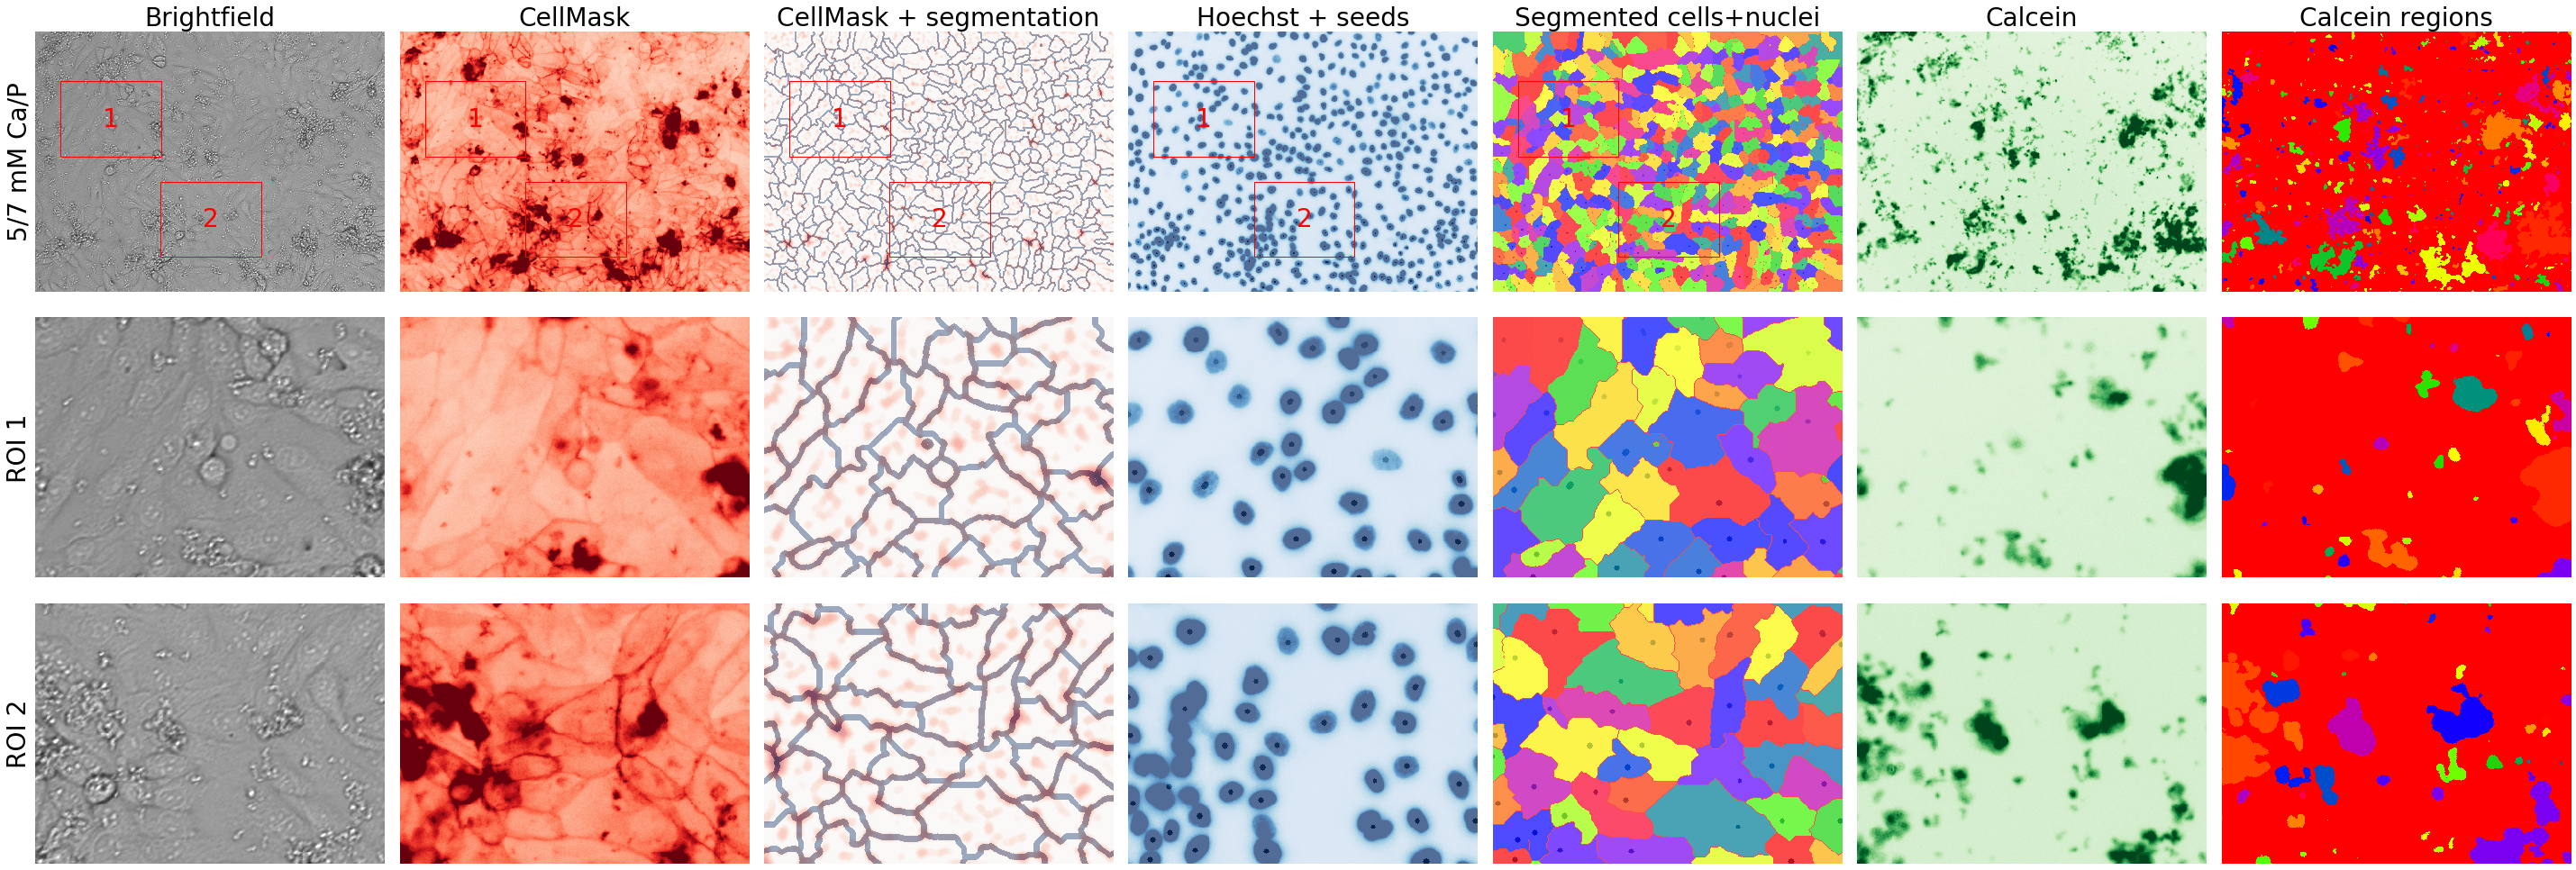

In [18]:
##Fig.1B-v2: cellmask and hoechst segmentation, calcein bw

vmin=0
vmax=100

##define 2 ROIs
h=300 #height
w=402 #width

x1=100 #define lower left corner of bb
y1=200
c1_1=x1+(w/2)
c1_2=y1+(h/2)
roi1_bb=patches.Rectangle((x1,y1),w,h,linewidth=1,edgecolor='r',facecolor='none') #roi with left bottom corner defined
roi1_list=[]
for x in range(5):
    roi1_list.append(roi1_bb)

x2=500
y2=600
c2_1=x2+(w/2)
c2_2=y2+(h/2)
roi2_bb=patches.Rectangle((x2,y2),w,h,linewidth=1,edgecolor='r',facecolor='none')
roi2_list=[]
for x in range(5):
    roi2_list.append(roi2_bb)

##extract channel images
test_idx=35#define test image 

test_img2=img_df.iloc[test_idx]
test_img2=test_img2[['CellMask','Hoechst','hoechst_seeds','cellmask_labels','hoechst_bw','cellmask_line',
                     'Brightfield','EthD','Calcein','distance_eros','calcein_label']]
test_img2=test_img2.to_frame()
test_img2=test_img2.transpose()
test_img2.reset_index(inplace=True)
test_img2.drop('index',axis=1,inplace=True)

roi1=pd.DataFrame(columns=test_img2.columns) #new dataframe for roi1 data
roi2=pd.DataFrame(columns=test_img2.columns) #new dataframe for roi2 data

##extraxt ROIs for each channel as new row
for idx in list(test_img2):
    roi1[idx]=(test_img2[idx].apply(lambda img:img[y1:y1+h+1,x1:x1+w+1]))
    roi2[idx]=(test_img2[idx].apply(lambda img:img[y2:y2+h+1,x2:x2+w+1]))
    
test_img2=test_img2.append(roi1) #add roi1 and 2 data to test_img
test_img2=test_img2.append(roi2)
test_img2.reset_index(inplace=True)

##plot full image and rois of all channels
fig1, m_axs = plt.subplots(len(test_img2),7, figsize=(40,14)) #plot some example images
fig1.tight_layout()

    
for (ax1,ax2,ax3,ax4,ax5,ax6,ax7), (idx,_) in zip(m_axs, test_img2.iterrows()):
    
    ax1.imshow(test_img2['Brightfield'].iloc[idx],cmap='gray',vmin=vmin,vmax=180)
    ax2.imshow(test_img2['CellMask'].iloc[idx],cmap='Reds',vmin=vmin,vmax=150)
    ax3.imshow(dilation(test_img2['distance_eros'].iloc[idx],disk(3)),cmap='Reds',alpha=0.7)
    ax3.imshow(dilation(test_img2['cellmask_line'].iloc[idx],disk(3)),cmap='Blues',alpha=0.4)
    ax4.imshow(test_img2['Hoechst'].iloc[idx],cmap='Blues',vmin=vmin,vmax=100)
    ax4.imshow(~test_img2['hoechst_seeds'].iloc[idx],cmap='gray',alpha=0.3)
    ax5.imshow(test_img2['cellmask_labels'].iloc[idx],cmap=plt.cm.prism)
    ax5.imshow(test_img2['hoechst_seeds'].iloc[idx],cmap='Blues',alpha=0.3)
    ax6.imshow(test_img2['Calcein'].iloc[idx],cmap='Greens',vmin=vmin,vmax=100)
    ax7.imshow(test_img2['calcein_label'].iloc[idx],cmap=plt.cm.prism)
    #ax5.imshow(~test_img2['hoechst_seeds'].iloc[idx],cmap='gray',alpha=0.8)
    
    
       
## add bounding box of ROIs to original image
for ax,bb1 in zip(m_axs[0,:],roi1_list):
    ax.add_patch(copy(bb1))
    ax.text(c1_1,c1_2,s='1',fontsize=28,color='r',horizontalalignment='center',verticalalignment='center')
for ax,bb2 in zip(m_axs[0,:],roi2_list):
    ax.add_patch(copy(bb2))
    ax.text(c2_1,c2_2,s='2',fontsize=28,color='r',horizontalalignment='center',verticalalignment='center')

## add labelling - channel and roi
cols=['Brightfield', 'CellMask','CellMask + segmentation','Hoechst + seeds','Segmented cells+nuclei','Calcein','Calcein regions']
for ax, col in zip(m_axs[0], cols):
    ax.set_title(col,size=28)
    
rows=['{} mM Ca/P'.format(img_df['cond_name'].iloc[test_idx]), 'ROI 1', 'ROI 2']    
for ax, row in zip(m_axs[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size=28)
fig1.tight_layout()    

os.chdir(r"/Users/anna/Documents/PhD/CalcificationImaging/ImagingData/paperFig_v1/")
#plt.savefig('Fig2B-v2_Seg_CaPrange01_{}.png'.format(img_df['cond_short'].iloc[test_idx]),bbox_inches="tight")


